Plot the data after rotate and centering.

In [10]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import numpy as np
import matplotlib.pyplot as plt

# Import CMasher to register colormaps
import cmasher as cmr
cmap = cmr.pride

save_folder = "/home/carlos/Documents/GitHub/Master-Degree/Plots for Dissertation/Images"
data_folder = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/Combined/Data/"

In [36]:
#ALMA data
imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/Alma_with_lens_center.fits",
        noise_map_path=f"{data_folder}/rms_noise_map.fits",
        psf_path=f"{data_folder}/Alma_psf_rot.fits",
        pixel_scales=0.01,
        image_hdu=1, noise_map_hdu=1, psf_hdu=1,
    )

mask        = al.Mask.from_fits( file_path=f"{data_folder}/mask.fits", 
                                pixel_scales=imaging.pixel_scales)

masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True)   #Masked image

#Vrms Data
x, y, vrms, erms = np.loadtxt(data_folder+"/Input/Vrms_map_rot.txt", unpack=True)           #vrms data



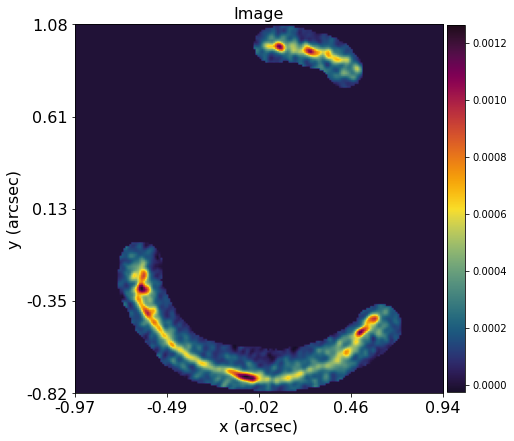

In [53]:
aplt.Imaging.individual(masked_image,plot_image=True,
                        plotter=aplt.Plotter(cmap=aplt.ColorMap(cmap=cmap),))
                                                                           
                                                                           


Text(0.5, 1.0, '$V_{rms}$')

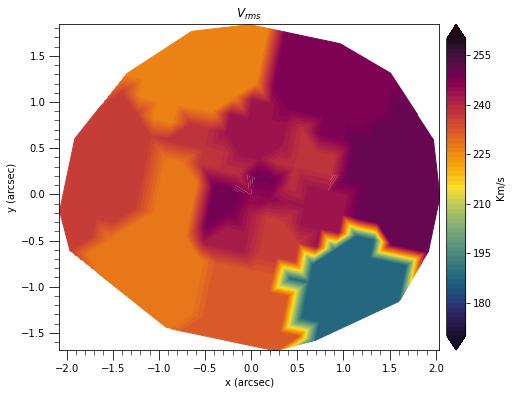

In [62]:
#Vrms Data
from plotbin.plot_velfield import plot_velfield
plt.figure(figsize=(9,6))
plot_velfield(x=x*0.2, y=y*0.2, vel=vrms, colorbar=True,label='Km/s',
              cmap=cmap, nodots=True, vmin=170, vmax=260)
plt.xlabel("x (arcsec)")
plt.ylabel("y (arcsec)")
plt.title("$V_{rms}$")